In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
df = pd.read_csv('../W3/data/housing.csv')
df.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


## Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

#### We shall base on the association between LSTAT and MEDV and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

In [15]:
c = 0.1
m = 1

df['guess_response'] = m * df['RM'] + c
df['observed_error'] = df['MEDV'] - df['guess_response']
sum_of_squared_errors = (df['observed_error'] ** 2).sum()

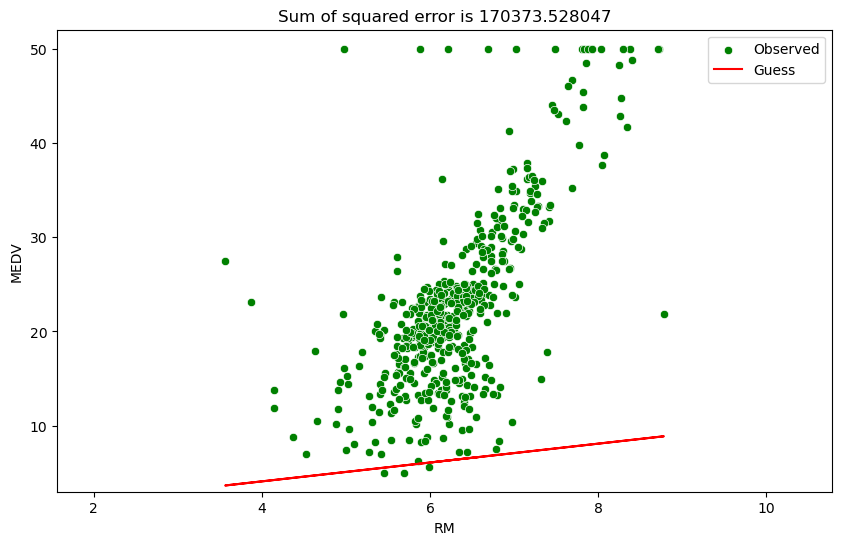

In [17]:
plt.figure(figsize=(10, 6))
plt.title(f'Sum of squared error is {sum_of_squared_errors}')
sns.scatterplot(x='RM', y='MEDV', data=df,color = 'g', label = 'Observed')
plt.plot(df['RM'], df['guess_response'], color='r', label='Guess')
plt.legend()
plt.xlim(df['RM'].min()-2, df['RM'].max()+2)
plt.ylim(df['MEDV'].min()-2, df['MEDV'].max()+2)
plt.show()


### Least sqaure estimates

In [23]:
formula = 'MEDV ~ RM'
model = smf.ols(formula = formula, data = df).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]
print(b0_ols, b1_ols)

df['best_response'] = b0_ols + b1_ols * df['RM']
df['error'] = df['MEDV'] - df['best_response']

sum_squared_error = (df['error'] ** 2).sum()

-34.670620776438575 9.102108981180313


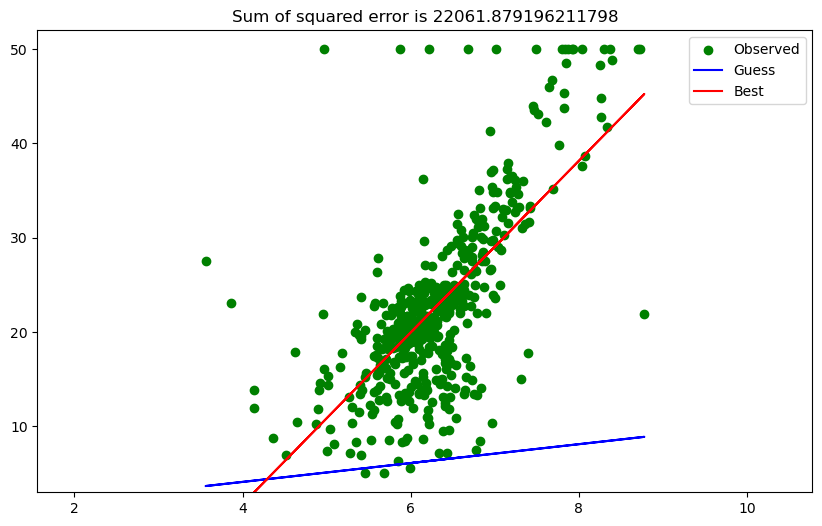

In [26]:
plt.figure(figsize=(10, 6))
plt.title(f'Sum of squared error is {sum_squared_error}')
plt.scatter(x='RM', y='MEDV', data=df, color='g', label='Observed')
plt.plot(df['RM'], df['guess_response'], color='b', label='Guess')
plt.plot(df['RM'], df['best_response'], color='r', label='Best')
plt.legend()
plt.xlim(df['RM'].min()-2, df['RM'].max()+2)
plt.ylim(df['MEDV'].min()-2, df['MEDV'].max()+2)
plt.show()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        14:18:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""